<a href="https://colab.research.google.com/github/anaaparamesh/Week1_Public/blob/master/Notebooks/07_Decision_Tree/DecisionTree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Worksheet

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)

# -- dropping NaN rows -- #
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)


## YOUR CODE HERE
# 80-20 train-test split of datset
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# further split X and y of training nto training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [7]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=20, min_samples_leaf=2)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have
# training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print accuracy of training and validation data.

In [8]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  96.0
Validation Accuracy is  79.36507936507937


Make a model with a low max-depth and higher minimum sample leafs.

In [10]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=3, min_samples_leaf=20)
# training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print accuracy of training and validation data.

In [11]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  80.4
Validation Accuracy is  74.60317460317461


Explain the accuracy results below. 

(YOUR ANSWER HERE)
high max-depth and low minimum sample leafs resulted in overfitting. Low max-depth and high minimum sample leafs did not result in overfitting  

## Metrics

Plot the ROC curve and print the AUC of the second model.

Probabilities:
 [0.34782609 0.65217391]

True Value:
 1


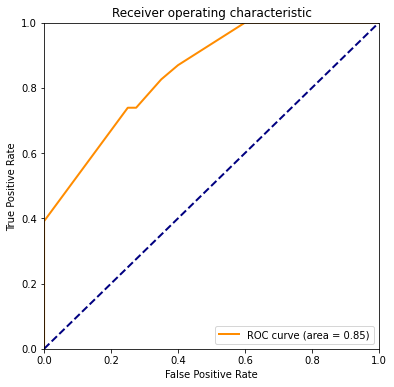

In [16]:
#Have to find probability to be able to graph roc curve.
labels = [0,1]
y_val_prob = decision_tree.predict_proba(X_val,labels)

# Output predicted and true values for the first validation point
print('Probabilities:\n',y_val_prob[0])
print('\nTrue Value:\n',y_val.values[0])
# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

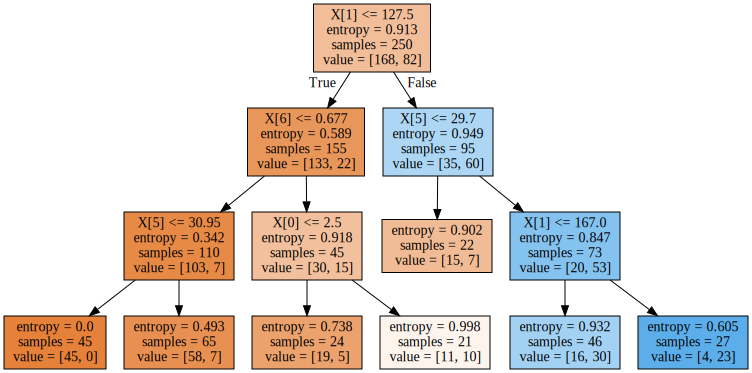

In [17]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)
I think X[n] refers to the X_test, or any prediction data point with index n.

Question 2: What is the root feature? Does it make sense as the root feature?
 I don't know what the root feature is.
(YOUR ANSWER HERE) 

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

I think the training accuracy would be 100% While the testing accuracy would be around 60%

(YOUR ANSWER HERE)

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [19]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)
# training/fitting the model with training data
decision_tree.fit(X_train, y_train)

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  76.19047619047619


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [20]:
## YOUR CODE HERE
# creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# training/fitting the model with training data
random_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Print accuracy of training and validation data.

In [21]:
## YOUR CODE HERE
#printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253


How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)
The validation accuaracy is higher for the random forest model.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

sklearn has the importance feature.
The 3 most important features are plas, test, and age

Feature: 0, Score: 0.08309
Feature: 1, Score: 0.24720
Feature: 2, Score: 0.07410
Feature: 3, Score: 0.09350
Feature: 4, Score: 0.14942
Feature: 5, Score: 0.10912
Feature: 6, Score: 0.11635
Feature: 7, Score: 0.12723


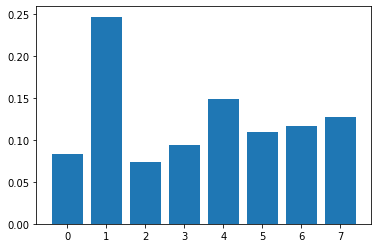

In [22]:
## YOUR CODE HERE
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

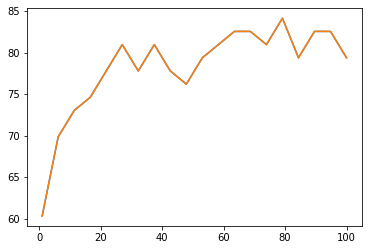

In [37]:
## YOUR CODE HERE
# creating a model w sklearn's RandomForestClassifier
accuracies = []
i = 1
while i <= 100:
  random_forest = RandomForestClassifier(n_estimators=i)
  random_forest.fit(X_train, y_train)
  y_val_pred=random_forest.predict(X_val)
  accuracies.append(accuracy_score(y_val, y_val_pred)*100)
  i += 5

import matplotlib.pyplot as plt
x = np.linspace(1, 100, num=20)
y = np.asarray(accuracies, dtype=np.float32)

x = x.reshape(-1, 1)
y = y.reshape(-1,1)
# Plot using matplotlib's object-oriented API:
# we figure and axis object: `fig` and `ax`
fig, ax = plt.subplots()
# we then use these objects to draw-on and manipulate our plot
ax.plot(x, y)

# Plot using matplotlib's functional API:
# a single function call produces a plot; convenient but less flexible
plt.plot(x, y)

#Can use loop to determine the highest value.



Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

Probabilities:
 [0.43 0.57]

True Value:
 1


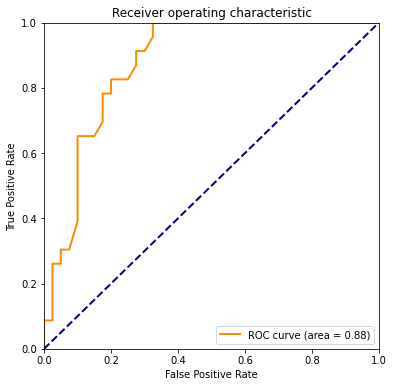

In [41]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)

# training/fitting the model with training data
random_forest.fit(X_train, y_train)

#Have to find probability to be able to graph roc curve.
labels = [0,1]
y_val_prob = random_forest.predict_proba(X_val)

# Output predicted and true values for the first validation point
print('Probabilities:\n',y_val_prob[0])
print('\nTrue Value:\n',y_val.values[0])
# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



In [ ]:
#Random forrest several copy of trees, where each nodes have different weights, returns the average accuracy of a tree of all trees because randomness in a single tree may result in accurate nodes, so different weights many trees prevents overfitting